In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
archivo_csv = 'Mexico_M.csv'

In [5]:
data = pd.read_csv(archivo_csv)

In [6]:
descripcion = data.describe()
print(descripcion)

           CVE_ENT       CVE_MUN       POB_TOT        ANALF        SBASC  \
count  2469.000000   2469.000000  2.469000e+03  2469.000000  2469.000000   
mean     19.215472  19324.164844  5.103849e+04    10.164466    45.853026   
std       7.367340   7382.892458  1.469907e+05     7.633633    13.981594   
min       1.000000   1001.000000  8.100000e+01     0.353446     5.535137   
25%      14.000000  14079.000000  4.489000e+03     4.427755    35.737568   
50%      20.000000  20226.000000  1.355200e+04     8.202762    46.339439   
75%      24.000000  24027.000000  3.528400e+04    13.787294    55.856378   
max      32.000000  32058.000000  1.922523e+06    53.071253    88.328076   

             OVSDE        OVSEE        OVSAE         OVPT         VHAC  \
count  2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean      3.159963     1.500793     6.118145     7.987232    26.566286   
std       5.289299     2.769167     9.245995     8.973591    10.586540   
min       0.000000 

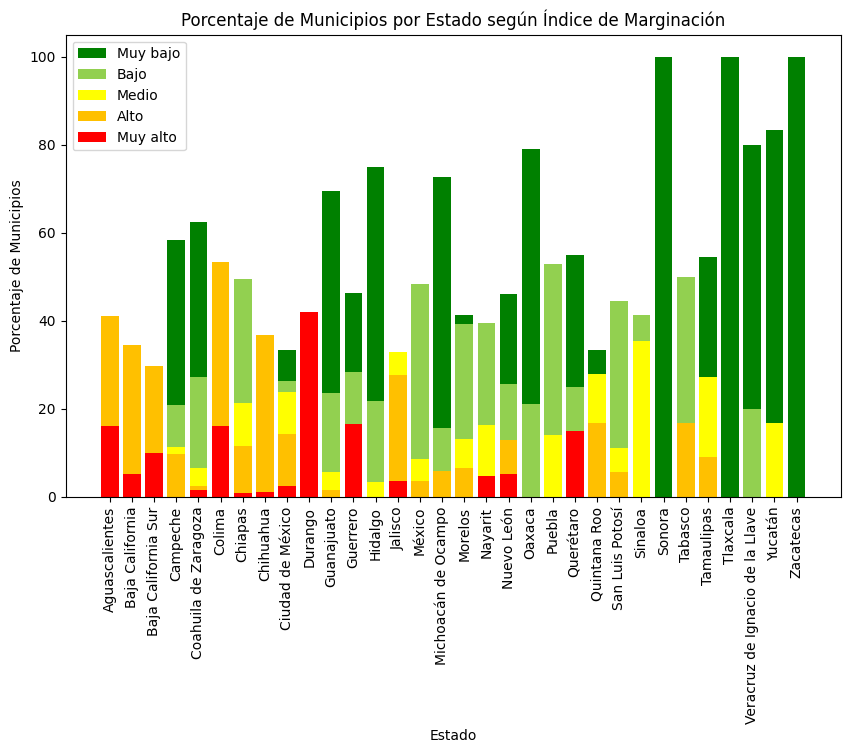

In [7]:


# procesamiento de los datos
estado_count = data['CVE_ENT'].value_counts()
categorias = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
colores = ['#008000', '#92D050', '#FFFF00', '#FFC000', '#FF0000']



plt.figure(figsize=(10, 6))

# generar los graficos individuales
for categoria, color in zip(categorias, colores):
    count = data[data['GM_2020'] == categoria]['CVE_ENT'].value_counts().reindex(estado_count.index, fill_value=0)
    porcentaje = (count / estado_count) * 100
    
    estados = data.drop_duplicates(subset=['CVE_ENT'])['NOM_ENT'].values
    x = range(len(estados))
    
    plt.xticks(x, estados, rotation=90)
    plt.bar(x, porcentaje, label=categoria, color=color)


plt.title('Porcentaje de Municipios por Estado según Índice de Marginación')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Municipios')


plt.legend()

plt.savefig('porcentaje_municipios.png')


plt.show()


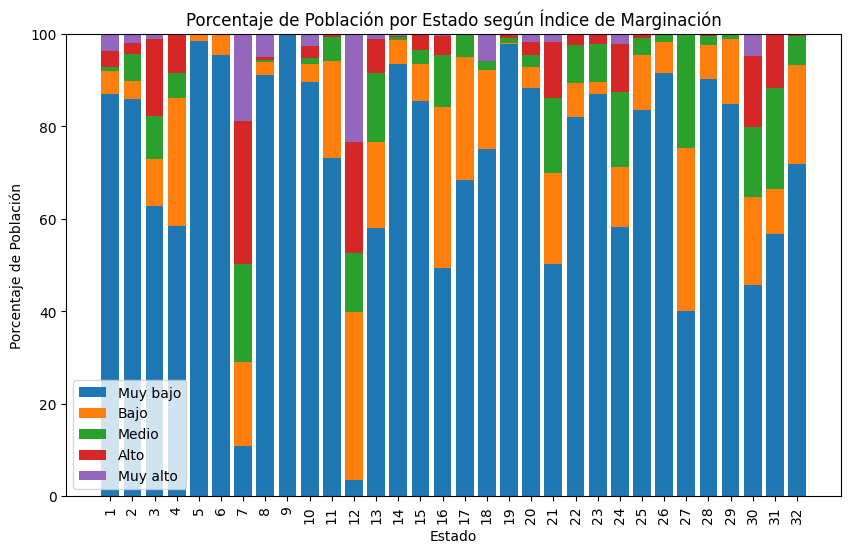

In [9]:

archivo_csv_2 = 'Mexico_porcentage.csv'

# Leer el archivo CSV
data = pd.read_csv(archivo_csv_2)

# Obtener la población total por estado
poblacion_total = data['POP_TOT']

# Obtener la suma de la población por categoría de índice de marginación
muy_bajo = data['muy_bajo']
bajo = data['bajo']
medio = data['medio']
alto = data['alto']
muy_alto = data['muy_alto']

# Calcular el porcentaje de población por categoría
porcentaje_muy_bajo = (muy_bajo / poblacion_total) * 100
porcentaje_bajo = (bajo / poblacion_total) * 100
porcentaje_medio = (medio / poblacion_total) * 100
porcentaje_alto = (alto / poblacion_total) * 100
porcentaje_muy_alto = (muy_alto / poblacion_total) * 100

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Configurar los estados en el eje x
estados = data['CVE_ENT'].values
x = range(len(estados))
plt.xticks(x, estados, rotation=90)

# Generar las barras de cada categoría
plt.bar(x, porcentaje_muy_bajo, label='Muy bajo')
plt.bar(x, porcentaje_bajo, label='Bajo', bottom=porcentaje_muy_bajo)
plt.bar(x, porcentaje_medio, label='Medio', bottom=porcentaje_muy_bajo + porcentaje_bajo)
plt.bar(x, porcentaje_alto, label='Alto', bottom=porcentaje_muy_bajo + porcentaje_bajo + porcentaje_medio)
plt.bar(x, porcentaje_muy_alto, label='Muy alto', bottom=porcentaje_muy_bajo + porcentaje_bajo + porcentaje_medio + porcentaje_alto)

# Configurar los títulos y etiquetas de los ejes
plt.title('Porcentaje de Población por Estado según Índice de Marginación')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Población')

# Mostrar la leyenda
plt.legend()

# Guardar la gráfica en formato jpg
plt.savefig('porcentaje_poblacion.jpg')

# Mostrar la gráfica
plt.show()


Hay coincidencias entre las graficas?
Algun hallazgo?

La segunda grafica es mucho mas precisa por que toma en cuenta a cada habitante,
la primera grafica solo muestra las veces que un municipio callo dentro del indice "Muy bajo", "Bajo", "Medio","Alto" o "Muy alto"
por eso la segunda grafica define de una mejor manera la informacion nos da un valor mas sustancioso para cuantas personas
poder saber cuantas personas estan dentro del indice, y poder compararalo de mejor manera.

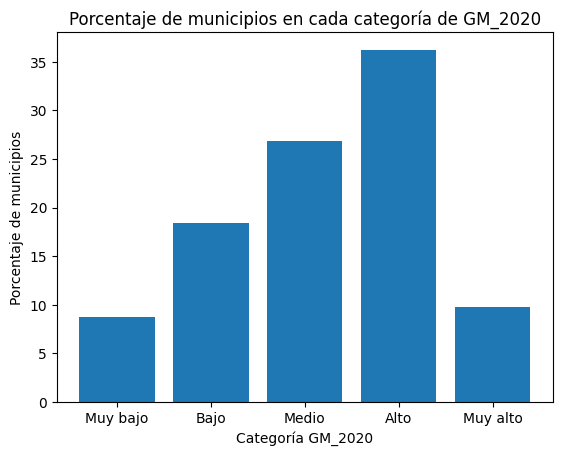

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
data = pd.read_csv('menor_5000.csv')

# Calcular el porcentaje de municipios en cada categoría de GM_2020
categories = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
percentages = []

for category in categories:
    category_count = data[data['gm_2020'] == category].shape[0]
    total_count = data.shape[0]
    percentage = (category_count / total_count) * 100
    percentages.append(percentage)

# Crear el gráfico de barras
plt.bar(categories, percentages)
plt.xlabel('Categoría GM_2020')
plt.ylabel('Porcentaje de municipios')
plt.title('Porcentaje de municipios en cada categoría de GM_2020')

# Mostrar la gráfica
plt.show()


Al parecer en lugares con menos de 5000 habitantes tiende a ser alto el nivel de analfabetismo, pero la grafica demuestra una tendencia hacia la izquierda.